# Two coupled TLS: the effect of decoherence on entanglement

The plan:
1. Start from 2 uncoupled qubits
2. Simulate and observe their entanglement
3. Arrive at a perfectly coupled state


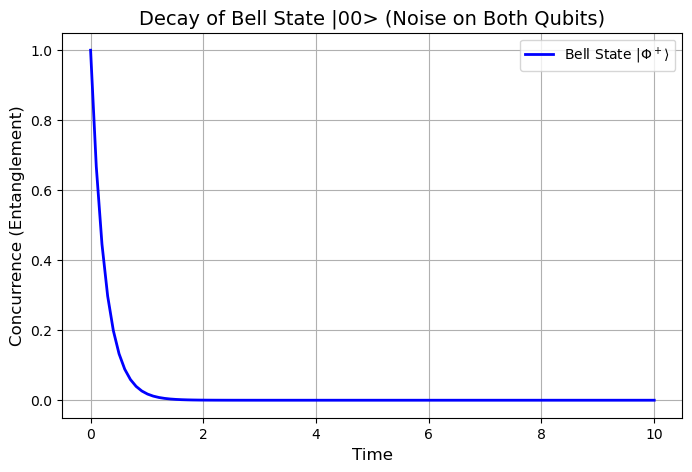

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import bell_state, ket2dm, tensor, qeye, sigmaz, mesolve, concurrence

# Start from Bell state 00, namely (1/sqrt(2)) * (|00> + |11>)
psi = bell_state('00')

density_matrix = ket2dm(psi)

# Define noise
gamma = 1 # coupling strength

# Create the collapse operators
c_operators = [
    np.sqrt(gamma) * tensor(sigmaz(), qeye(2)), # Collapse operator attacking qubit 1
    np.sqrt(gamma) * tensor(qeye(2), sigmaz()) # Collapse operator attacking qubit 2
]   

# Set the Hamiltonian to 0
# This is done in order to have our full focus on the decoherence
H = 0 * tensor(qeye(2), qeye(2))


# Snapshots of our simulation
times = np.linspace(0, 10, 100)
result = mesolve(H, density_matrix, times, c_operators)

concurrence_list = []
for state in result.states:
    concurrence_list.append(concurrence(state))
    
plt.figure(figsize=(8, 5))
plt.plot(times, concurrence_list, label=r'Bell State $|\Phi^+\rangle$', color='blue', linewidth=2)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concurrence (Entanglement)', fontsize=12)
plt.title('Decay of Bell State |00> (Noise on Both Qubits)', fontsize=14)
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()
